<a href="https://colab.research.google.com/github/jithamanyu001/CV/blob/main/Neural_style_transfer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn,optim
import torchvision
import torchvision.models as models
import torchvision.transforms as tt
from PIL import Image
from torchvision.utils import save_image 

In [2]:
model=models.vgg19(pretrained=True).features
print(model)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth


  0%|          | 0.00/548M [00:00<?, ?B/s]

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU(inplace=True)
  (18): MaxPoo

In [3]:
['0','5','10','19','28']

['0', '5', '10', '19', '28']

In [36]:
class vgg(nn.Module):
  def __init__(self) -> None:
    super(vgg,self).__init__()
    self.features=['0','5','10','19','28']
    self.model=models.vgg19(pretrained=True).features[:29]
  def forward(self,x):
    features=[]
    for layer_num,layer in enumerate(self.model):
      x=layer(x)
      if(str(layer_num) in self.features):
        features.append(x)
    return features

In [5]:
device="cuda:0" if torch.cuda.is_available() else 'cpu'

In [17]:
loader=tt.Compose([
    tt.Resize((320,320)),
    tt.ToTensor(),
    #optinoal normalization can be done
    tt.Normalize(mean=(0.485, 0.456, 0.406), 
            std=(0.229, 0.224, 0.225))
])

In [18]:
def load_img(image_name):
  img=Image.open(image_name)
  img=loader(img).unsqueeze(0).to(device)
  return img

In [8]:
!wget https://storage.googleapis.com/download.tensorflow.org/example_images/YellowLabradorLooking_new.jpg

--2022-12-30 23:30:53--  https://storage.googleapis.com/download.tensorflow.org/example_images/YellowLabradorLooking_new.jpg
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.193.128, 172.217.204.128, 172.217.203.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.193.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 83281 (81K) [image/jpeg]
Saving to: ‘YellowLabradorLooking_new.jpg’

YellowLabradorLooki 100%[===================>]  81.33K  --.-KB/s    in 0.001s  

2022-12-30 23:30:53 (85.3 MB/s) - ‘YellowLabradorLooking_new.jpg’ saved [83281/83281]



In [9]:
!wget https://storage.googleapis.com/download.tensorflow.org/example_images/Vassily_Kandinsky%2C_1913_-_Composition_7.jpg

--2022-12-30 23:30:53--  https://storage.googleapis.com/download.tensorflow.org/example_images/Vassily_Kandinsky%2C_1913_-_Composition_7.jpg
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.193.128, 172.217.204.128, 172.217.203.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.193.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 195196 (191K) [image/jpeg]
Saving to: ‘Vassily_Kandinsky,_1913_-_Composition_7.jpg’

Vassily_Kandinsky,_ 100%[===================>] 190.62K  --.-KB/s    in 0.002s  

2022-12-30 23:30:53 (112 MB/s) - ‘Vassily_Kandinsky,_1913_-_Composition_7.jpg’ saved [195196/195196]



In [19]:
original_img=load_img('/content/YellowLabradorLooking_new.jpg')
style_img=load_img("/content/Vassily_Kandinsky,_1913_-_Composition_7.jpg")

In [30]:
generated=original_img.clone().requires_grad_(True)

In [37]:
model=vgg().to(device).eval()

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [39]:
total_steps=500
lr=0.01
alpha=1
beta=0.01
optimizer=optim.Adam([generated],lr=lr,betas=[0.5,0.999])

In [ ]:
for step in range(total_steps):
  generated_features=model(generated)
  original_features=model(original_img)
  style_features=model(style_img)
  style_loss=original_loss=0

  for gen_feature,org_feature,sty_feature in zip(generated_features,original_features,style_features):
    b,c,h,w=gen_feature.shape
    original_loss+=torch.mean((org_feature-gen_feature)**2)
    #gram matrix --> this is calculated as a corelation measure between the images
    G=gen_feature.view(c,h*w).mm(gen_feature.view(c,h*w).t()) 
    S=sty_feature.view(c,h*w).mm(sty_feature.view(c,h*w).t()) 
    style_loss+=torch.mean((G-S)**2) / (c * h * w) 
  tot_loss=alpha*original_loss+beta*style_loss
  optimizer.zero_grad()
  tot_loss.backward()
  optimizer.step()
  if step%100 == 0:
    print(f"loss={tot_loss.detach().item()}")

loss=26.319042205810547
loss=23.220664978027344
loss=22.528282165527344
loss=22.10144805908203


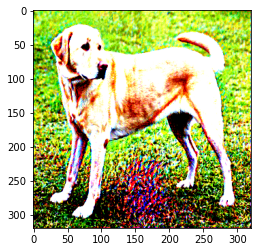

In [44]:
denorm = tt.Normalize((-2.12, -2.04, -1.80), (4.37, 4.46, 4.44))
img = generated.clone().squeeze()
img = denorm(img).clamp_(0, 1)
import matplotlib.pyplot as plt
plt.imshow(generated.detach().cpu()[0].permute(1,2,0))